In [2]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [3]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [4]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

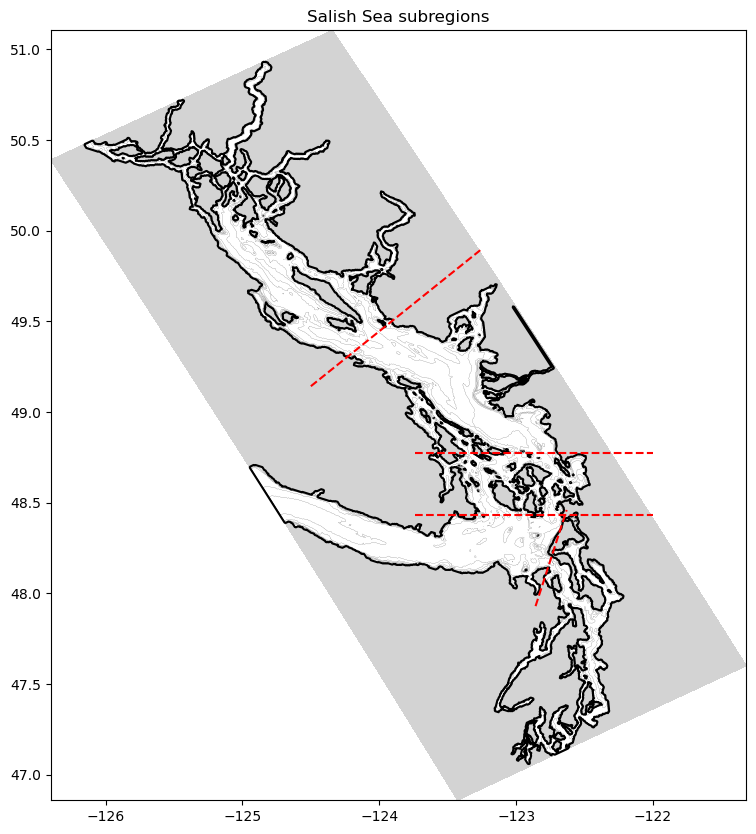

In [5]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [6]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [7]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Lori_obs = pd.read_csv('Loridata.csv')
Time=np.linspace(0,365,8017)

In [8]:
Lori_obs

,Unnamed: 0,Date,SampleDate,Station,Vessel,People,Lat,Long,Depth (m),50um RigA,...,200um RigE,start_time,end_time,volume_A (L),volume_E (L),ConcA,ConcE,Conc,Concmean,ConcSD
0,0,Jan 28 2021,28-Jan,1,Kraken - EOAS UBC,"Lori W., Chris P.",49.033950,-123.267167,.5 - 1,F15,...,N3,11:55,1:16,1132.80,801.20,2.648305,2.496256,2.585315,2.572280,0.107515
1,1,Jan 28 2022,28-Jan,1,Kraken - EOAS UBC,"Lori W., Chris P.",49.033000,-123.268167,.5 - 2,F3,...,N6,1:28,2:13,667.82,404.20,0.000000,4.948046,1.865637,2.474023,3.498797
2,2,Jan 28 2021,28-Jan,1,Kraken - EOAS UBC,"Lori W., Chris P.",49.034167,-123.266283,.5 - 1,F1,...,N2,2:26,2:42,258.82,171.92,7.727378,5.816659,6.964758,6.772019,1.351082
3,3,Mar 2 2021,02-Mar,1,Kraken - EOAS UBC,"Lori W., Chris P.",49.033750,-123.268683,0.5,F16,...,N4,10:34,11:19,727.80,596.70,2.748008,3.351768,3.020008,3.049888,0.426923
4,4,Mar 2 2021,02-Mar,2,Kraken - EOAS UBC,"Lori W., Chris P.",49.064650,-123.318383,0.5,F1,...,N3,11:57,12:34,558.00,529.20,1.792115,1.889645,1.839588,1.840880,0.068964
5,5,Mar 2 2021,02-Mar,3,Kraken - EOAS UBC,"Lori W., Chris P.",49.101083,-123.331350,0.5,F8,...,N12,1:00,1:35,580.10,512.50,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,Mar 2 2021,02-Mar,4,Kraken - EOAS UBC,"Lori W., Chris P.",49.151367,-123.309700,0.5,F2,...,N8,2:00,2:35,541.40,506.60,1.847063,5.921832,3.816794,3.884447,2.881297
7,7,Mar 2 2021,02-Mar,5,Kraken - EOAS UBC,"Lori W., Chris P.",49.207317,-123.303667,0.5,F11,...,N14,2:56,15:30,534.30,502.20,1.871608,1.991239,1.929571,1.931423,0.084592
8,8,June 16 2021,16-Jun,5,Kraken - EOAS UBC,"Lori W., Stefanie",49.205417,-123.299017,0.5,F6,...,N6,9:17,9:52,574.00,645.80,1.742160,3.096934,2.459420,2.419547,0.957970
9,9,June 16 2021,16-Jun,6,Kraken - EOAS UBC,"Lori W., Stefanie",49.236350,-123.324967,0.5,F15,...,N7,10:12,10:40,500.70,786.50,3.994408,3.814367,3.884400,3.904388,0.127308


In [9]:
Lori_obs.groupby(by = 'Station').Conc.mean()
Lori_obs.groupby(by = 'Station').Conc.quantile(0.25)
Lori_obs.groupby(by = 'Station').Conc.quantile(0.75)


Station
1     4.006195
2     1.839588
3     0.000000
4     3.816794
5     2.326957
6     3.884400
7     0.000000
8     2.268259
9     5.767013
10    1.931024
Name: Conc, dtype: float64

In [10]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',1],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Abr':['Run_Abril20190401_.nc',91],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat<(7/3)*data_new.lon+334.6]
    elif area=='JdF':
        data_new = data[data.lat<48.43]
        data_new = data_new[data_new.lat>(7/3)*data_new.lon+334.6]
    elif area=='Haro':  
        data_new = data[data.lat<48.774]
        data_new = data_new[data_new.lat>48.43]  
        data_new = data_new[data_new.lon<-123]  
        data_new = data_new[data_new.lon>-123.456] 

    elif area=='Haro2':  
        data_new = data[data.lat<48.774]
        data_new = data_new[data_new.lat>48.43]  
        
    elif area=='NSoG':
        data_new = data[data.lat>(20/33)*data.lon+124.597]
    elif area=='CSSoG': 
        data_new = data[data.lat>48.774] 
        data_new = data_new[data_new.lat<(20/33)*data_new.lon+124.597]
    else:
        print('Unrecognized subarea')  
    return data_new


Text(0.5, 1.0, 'Count particles')

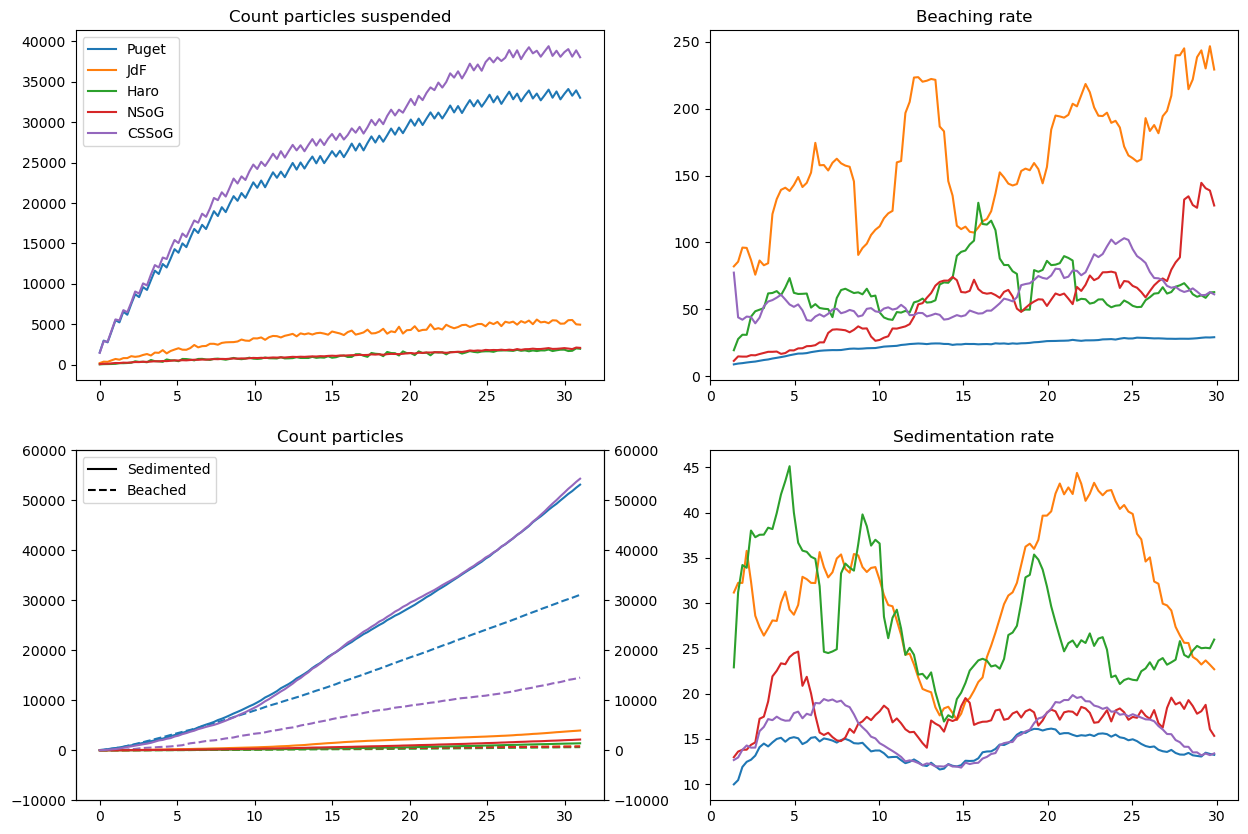

In [11]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
twin3 = axs[1,0].twinx()
alpha = '5,000 s'
ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
x = np.linspace(0,31,ds.dims['obs']-1)
x2 = np.linspace(0,31,ds.dims['obs']-1)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
for area in sub_areas:
    DSn = cutting(DS,area)
    counting(DSn,area,axs,runs[alpha][1])
axs[0,0].legend()
legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
                plt.Line2D([0], [0], color='black', linestyle='--')]
axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
axs[0,1].set_title('Beaching rate')
axs[1,1].set_title('Sedimentation rate')
axs[0,0].set_title('Count particles suspended')
axs[1,0].set_title('Count particles')
#axs[0,1].set_yscale('log')
#axs[1,1].set_yscale('log')

In [12]:
def finder(jjii,lati,loni):
    if type(lati) is list:
        #print('list of coordinates')
        i = []
        j = []
        for ni,lat in enumerate(lati):
            j.append([jjii.jj.sel(lats=lat, lons=loni[ni], method='nearest').item()][0])
            i.append([jjii.ii.sel(lats=lat, lons=loni[ni], method='nearest').item()][0])
    else:
        j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
        i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [13]:
np.average(Lori_obs['Concmean'])*20 #!Lori estimated that only 5% of fibers are recovered.

np.float64(55.57330424171897)

In [14]:
def artificial_hr(var,Ni,mask):    
    new_conc = np.zeros_like(mask.tmask[0,...],dtype='f')
    for i in range(new_conc.shape[1]):
        for j in range(new_conc.shape[2]):
            new_conc[:,i,j]=var[:,int(i/Ni),int(j/Ni)]
    return new_conc

In [15]:
obs=list(Lori_obs.groupby(by='Station')['Concmean'].mean())
latobs =list(Lori_obs.groupby(by='Station')['Lat'].mean())
lonobs =list(Lori_obs.groupby(by='Station')['Long'].mean())

For alpha of 250 s the estimated average concentration of the selected area is 0.9708858528840227 MF/m3
For alpha of 500 s the estimated average concentration of the selected area is 1.2056237669160825 MF/m3
For alpha of 1,000 s the estimated average concentration of the selected area is 1.464932182556933 MF/m3
For alpha of 2,500 s the estimated average concentration of the selected area is 1.8933652354261041 MF/m3
For alpha of 5,000 s the estimated average concentration of the selected area is 2.1780355993741285 MF/m3
For alpha of 10,000 s the estimated average concentration of the selected area is 2.4308286318101535 MF/m3
For alpha of 50,000 s the estimated average concentration of the selected area is 2.723688822809646 MF/m3


<Figure size 640x480 with 0 Axes>

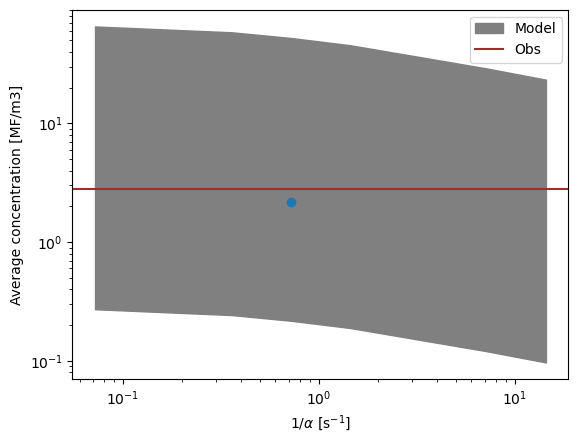

<Figure size 640x480 with 0 Axes>

In [16]:
def modelvsobs(j,i,conc,ni=0):
    CONC = []
    for ind,ii in enumerate(i):
        if ni ==0:
            CONC.append(np.sum(conc[:5,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(np.sum(np.sum(np.sum(conc[:5,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],axis=0),axis=0),axis=0)/(5*(1+ni*2)**2))
    return np.mean(CONC),np.std(CONC)/len(CONC)


iii = np.array([250,500,1000,2500,5000,10000,50000])
NNstdl = []
NNl = []
j,i=finder(jjii,latobs,lonobs)

for alpha in runs: 
    CONC = np.load(path_runs+runs[alpha][0].split('.')[0]+'.npy')/runs[alpha][1]
    NN,Nstd = modelvsobs(j,i,CONC,5)
    NNstdl.append(Nstd)
    NNl.append(NN)
    print(f'For alpha of {alpha} the estimated average concentration of the selected area is {NN} MF/m3')
#plt.plot(iii,NNl,'.-',label='Model')
#plt.plot(iii,np.array(NNl)/2.4,'.-',label='Model')
plt.fill_between(3600/iii,np.array(NNl)/10,np.array(NNl)*24,color = 'grey',label='Model')
#plt.errorbar(iii, NNl, NNstdl, linestyle='None', color= 'tab:blue',marker='.')
plt.axhline(y=np.average(Lori_obs['Concmean']),c='brown',label='Obs')
#plt.axhline(y=np.average(Lori_obs['Concmean'])*5,c='b',label='Obs x 5')
#plt.axhline(y=np.average(Lori_obs['Concmean'])*10,c='r',label='Obs x 10')
#plt.axhline(y=np.average(Lori_obs['Concmean'])*20,c='g',label='Obs x 20')
CONC = np.load(path_runs+runs['5,000 s'][0].split('.')[0]+'.npy')/runs[alpha][1]
nn,nstd = modelvsobs(j,i,CONC,5)
plt.scatter(3600/5000,nn)
plt.legend(loc='upper right')
plt.xlabel(r'1/$\alpha$ [s$^{-1}$]')
plt.ylabel('Average concentration [MF/m3]')
plt.xscale('log')
plt.yscale('log')
plt.figure()


For alpha of Jan the estimated average concentration of the selected area is 29.83908771142556 MF/m3
For alpha of Feb the estimated average concentration of the selected area is 22.32307018662126 MF/m3
For alpha of Mar the estimated average concentration of the selected area is 25.128064689441175 MF/m3
For alpha of Abr the estimated average concentration of the selected area is 25.908626631931213 MF/m3
For alpha of Jun the estimated average concentration of the selected area is 13.255998258194234 MF/m3
For alpha of Jul the estimated average concentration of the selected area is 15.014184185970104 MF/m3
For alpha of Aug the estimated average concentration of the selected area is 17.75156671135081 MF/m3


Text(0.5, 1.0, 'Mean Concentrations for $\\alpha$ = 5,000 s')

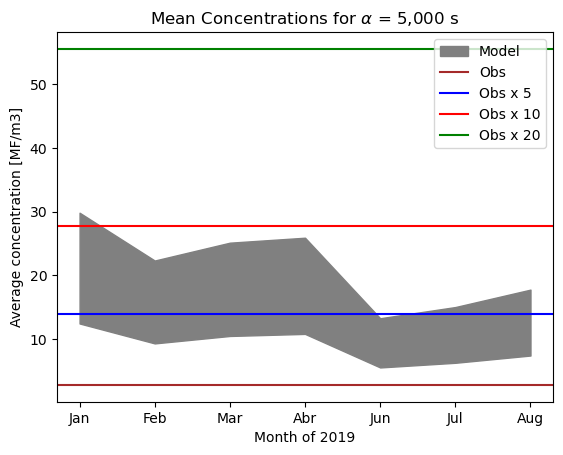

In [17]:
def modelvsobs(j,i,conc,ni=0):
    CONC = []
    for ind,ii in enumerate(i):
        if ni ==0:
            CONC.append(np.sum(conc[:5,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(np.sum(np.sum(np.sum(conc[:5,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],axis=0),axis=0),axis=0)/(5*(1+ni*2)**2))
    return np.mean(CONC),np.std(CONC)/len(CONC)


iii = ['Jan','Feb','Mar','Abr','Jun','Jul','Aug']
NNstdl = []
NNl = []

for alpha in months: 
    CONC = np.load(path_runs+months[alpha][0].split('.')[0]+'.npy')*13.7/1
    NN,Nstd = modelvsobs(j,i,CONC,5)
    NNstdl.append(Nstd)
    NNl.append(NN)
    print(f'For alpha of {alpha} the estimated average concentration of the selected area is {NN} MF/m3')
#plt.plot(iii,NNl,'.-',label='Model')
#plt.errorbar(iii, NNl, NNstdl, linestyle='None', color= 'tab:blue',marker='.')
plt.fill_between(iii,NNl,np.array(NNl)/2.4,color = 'grey',label='Model')
plt.axhline(y=np.average(Lori_obs['Concmean']),c='brown',label='Obs')
plt.axhline(y=np.average(Lori_obs['Concmean'])*5,c='b',label='Obs x 5')
plt.axhline(y=np.average(Lori_obs['Concmean'])*10,c='r',label='Obs x 10')
plt.axhline(y=np.average(Lori_obs['Concmean'])*20,c='g',label='Obs x 20')
plt.legend(loc='upper right')
plt.xlabel(r'Month of 2019')
plt.ylabel('Average concentration [MF/m3]')
plt.title(r'Mean Concentrations for $\alpha$ = 5,000 s')

For alpha of 5,000 s the estimated average concentration of 1 is 30.458443690173198 MF/m3
For alpha of 5,000 s the estimated average concentration of 2 is 30.44144074048735 MF/m3
For alpha of 5,000 s the estimated average concentration of 3 is 30.99694379432629 MF/m3
For alpha of 5,000 s the estimated average concentration of 4 is 31.421820793050383 MF/m3
For alpha of 5,000 s the estimated average concentration of 5 is 24.712858997859794 MF/m3
For alpha of 5,000 s the estimated average concentration of 6 is 18.605331400117944 MF/m3
For alpha of 5,000 s the estimated average concentration of 7 is 6.642942451850219 MF/m3
For alpha of 5,000 s the estimated average concentration of 8 is 1.9597207564877386 MF/m3
For alpha of 5,000 s the estimated average concentration of 9 is 0.47792253264006157 MF/m3
For alpha of 5,000 s the estimated average concentration of 10 is 0.10586180402160786 MF/m3


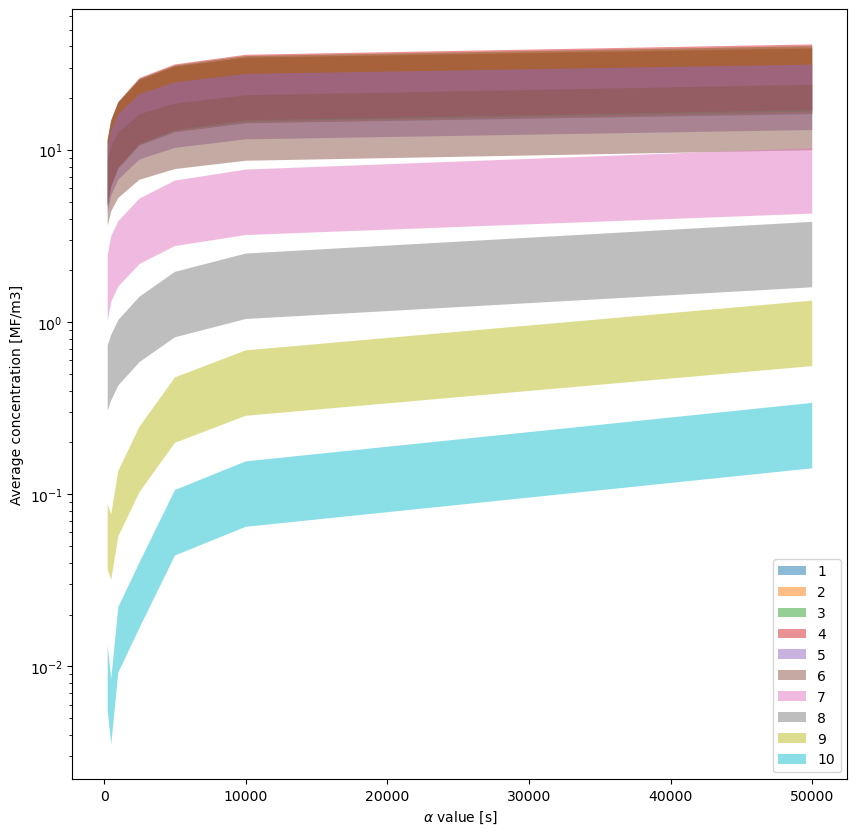

In [18]:
def modelvsobs(j,i,conc,ni=0,zi=2):
    CONC = []
    if type(i)==list:
        for ind,ii in enumerate(i):
            if ni ==0:
                CONC.append(np.sum(conc[:zi,int(j[ind]/3),int(ii/3)],axis=0)/zi)
            else:
                CONC.append(np.sum(np.sum(np.sum(conc[:zi,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],axis=0),axis=0),axis=0)/(zi*(1+ni*2)**2))
        return np.mean(CONC),np.std(CONC)/len(CONC)
    else:
        if ni ==0:
                CONC=np.sum(conc[:zi,int(j/3),int(i/3)],axis=0)/zi
        else:
                CONC=np.sum(np.sum(np.sum(conc[:zi,int(j/3)-ni:int(j/3)+ni+1,int(i/3)-ni:int(i/3)+ni+1],axis=0),axis=0),axis=0)/(zi*(1+ni*2)**2)
        return CONC

locss = [1,2,3,4,5,6,7,8,9,10]
iii = [250,500,1000,2500,5000,10000,50000]
j_lori,i_lori=finder(jjii,latobs,lonobs)
fig,axs=plt.subplots(1,1,figsize=(10,10))
for loc in range(len(i)):
    NNl = []
    for alpha in runs: 
        CONC = np.load(path_runs+runs[alpha][0].split('.')[0]+'.npy')*13.7/runs[alpha][1]
        NN = modelvsobs(j_lori[loc],i_lori[loc],CONC,10,5)
        NNl.append(NN)
        if alpha == '5,000 s':
            print(f'For alpha of {alpha} the estimated average concentration of {locss[loc]} is {NN} MF/m3')
    plt.fill_between(iii,NNl,np.array(NNl)/2.4,label=locss[loc],alpha=0.5)
    plt.xlabel(r'$\alpha$ value [s]')
    plt.ylabel('Average concentration [MF/m3]')
axs.set_yscale('log')
plt.legend()

In [21]:
iilat,jjlon=finder(jjii,latobs,lonobs)


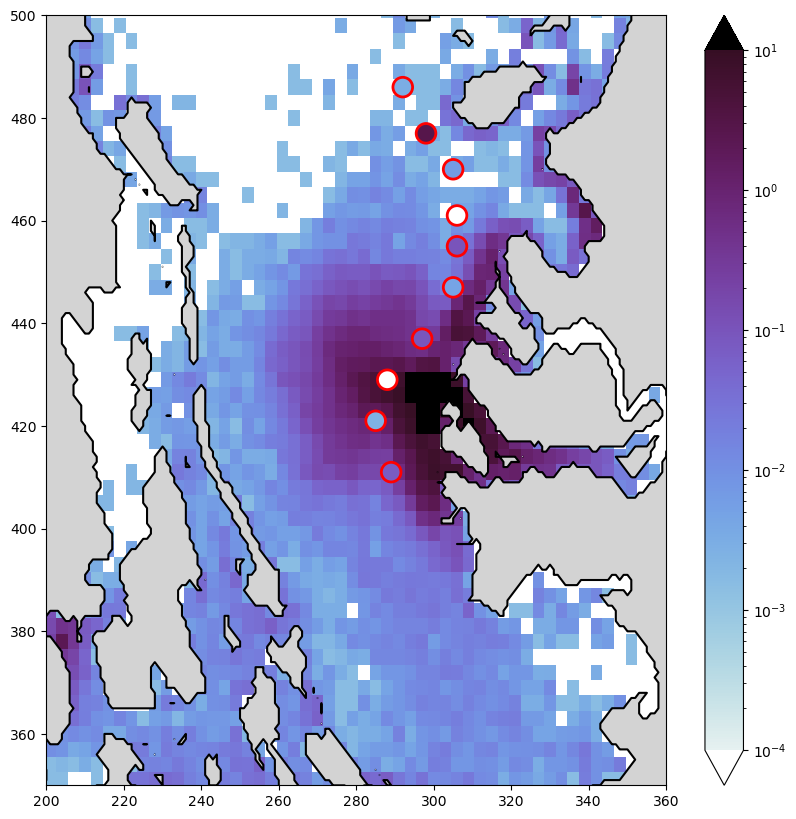

In [43]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-5,10,30)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
conc = np.load(path_runs+'Run_Enero20190101_.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.npy')
conc4 = np.load(path_runs+'Run_Abril20190401_.npy')
conc_winter = (conc + conc2 + conc3+conc4)/4

conc = np.load(path_runs+'Run_Junio20190601_.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.npy')
conc_summer = (conc + conc2 + conc3)/3
CONC_aver = (conc_winter + conc_summer)/2
Ni = 3
x = np.linspace(0,397,398)
y = np.linspace(0,897,898)
X, Y =np.meshgrid(x,y)
aa = ax.pcolormesh(X[::Ni,::Ni], Y[::Ni,::Ni],np.sum(CONC_aver[:5,:,:],axis=0)/5,norm=colors.LogNorm(vmin=1e-4,vmax=10),snap = True,cmap=cmocean.cm.dense)
#ax.contour(X,Y, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(X,Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(X,Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
sc=plt.scatter(jjlon,iilat,s = 200, c = np.array(obs)*10,cmap=cmocean.cm.dense,vmax=65,vmin=1e-5,edgecolors='red',linewidth = 2)
# aa.cmap.set_over('black')
# aa.cmap.set_under('white')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
plt.colorbar(aa,extend='both')
plt.ylim([350,500])
plt.xlim([200,360])
#plt.title('Model results vs Observations')
plt.savefig('obs_model.pdf')


(150.0, -2.0)

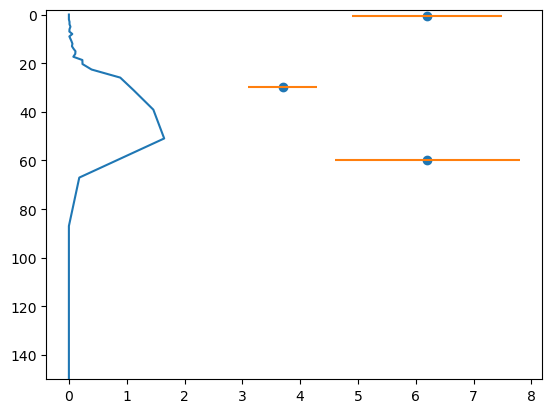

In [19]:
nicolecoord = [49.3276121298886, -123.22216999756373]
nicoledepth = [0.5,30,60]
concni = [6.2,3.7,6.2]
stdni = [1.3,0.6,1.6]

j_nicole,i_nicole=finder(jjii,nicolecoord[0],nicolecoord[1])

plt.plot(CONC_aver[:,j_nicole//Ni,i_nicole//Ni],mask.gdepw_0[0,:,j_nicole//Ni,i_nicole//Ni])
plt.errorbar(concni,nicoledepth,xerr=stdni,linestyle='none')
plt.scatter(concni,nicoledepth)
plt.ylim(150,-2)

In [20]:
loriobs = obs

In [21]:
def check_variability(lat,lon,Data,size=1,dtstep = 1):
    '''dtstep is over how many dt you want to average'''
    deg2met = 111319.5
    latT = 0.6495
    dLat = (250*size)/deg2met
    dLon = (250*size)/(deg2met*latT)
    MFc = 5e6
    conc = []
    for i in range((ds.dims['obs']-1)//dtstep):
        times= np.min(DS.time)+i*dtstep*6*3600
        if dtstep == 1:
            data =  Data[Data.time==times]
        else:
            data =  Data[np.logical_and(Data.time>=times, Data.time<(times+dtstep*6*3600))]
        data = data[data.z*data.fact<5]
        data = data[np.logical_and(data.lat>lat - dLat,data.lat<lat + dLat)]
        data = data[np.logical_and(data.lon>lon - dLon,data.lon<lon + dLon)]
        conc.append(MFc*len(data.lat)/(5*(dtstep*size*500)**2))
    return conc
#

In [22]:
def check_variability_depth(lat,lon,Data,depth,size=1,dtstep = 1):
    '''dtstep is over how many dt you want to average'''
    deg2met = 111319.5
    latT = 0.6495
    dLat = (250*size)/deg2met
    dLon = (250*size)/(deg2met*latT)
    MFc = 5e6
    conc = []
    for i in range((ds.dims['obs']-1)//dtstep):
        times= np.min(DS.time)+i*dtstep*6*3600
        if dtstep == 1:
            data =  Data[Data.time==times]
        else:
            data =  Data[np.logical_and(Data.time>=times, Data.time<(times+dtstep*6*3600))]
        data = data[np.logical_and(data.z*data.fact<depth,data.z*data.fact>depth-6)]
        data = data[np.logical_and(data.lat>lat - dLat,data.lat<lat + dLat)]
        data = data[np.logical_and(data.lon>lon - dLon,data.lon<lon + dLon)]
        conc.append(MFc*len(data.lat)/(10*(dtstep*size*500)**2))
    return conc
#

In [23]:
nicoledepth2 = np.linspace(0,60,11)
# cons = np.zeros([len(nicoledepth2),197])
# for i in range(1,len(nicoledepth2)):
#     con = []
#     for mes in months:
#         ds = xr.open_dataset(path_runs+months[mes][0], decode_times=False)
#         DS = ds.to_dataframe()
#         DS = DS[DS.time>0]
#         con = np.append(con,check_variability_depth(nicolecoord[0],nicolecoord[1],DS,depth =nicoledepth2[i],  size =4,dtstep=4))
#     cons[i,:] = con
# np.save('modelatnicole_70m_4_averdt.npy',cons)

In [24]:
consnic = np.load('modelatnicole_70m_4_averdt.npy')

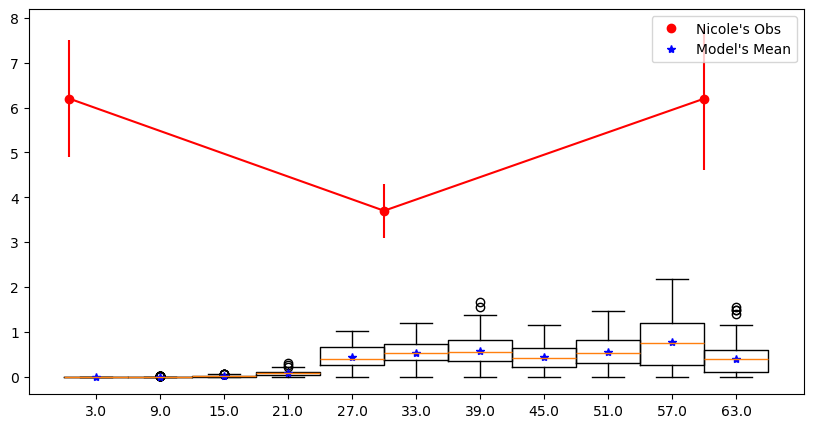

In [25]:
plt.figure(figsize=(10,5))
plt.boxplot(consnic.T,positions=nicoledepth2+3, widths=6.0)
plt.plot(nicoledepth,concni,'ro',label="Nicole's Obs")
#plt.fill_between(np.arange(1,11),np.zeros_like(np.arange(1,11)),np.max(cons.T,axis=0)*24,alpha=0.5,color='grey',label='WWTP efficiency range')
#plt.scatter(np.arange(1,11),np.max(cons.T,axis=0)*24,color='grey')
plt.plot(nicoledepth2+3,np.mean(consnic,axis=1),'b*',label="Model's Mean")
plt.errorbar(nicoledepth,concni,yerr=stdni,c = 'r')
plt.legend()
#plt.ylim(0,20)
#plt.yscale('log')

In [26]:
# cons = np.zeros([len(latobs),197])

# for i in range(len(latobs)):
#     con = []
#     for mes in months:
#         ds = xr.open_dataset(path_runs+months[mes][0], decode_times=False)
#         DS = ds.to_dataframe()
#         DS = DS[DS.time>0]
#         con = np.append(con,check_variability(latobs[i],lonobs[i],DS,size = 4,dtstep=4))
#     cons[i,:] = con
# np.save('modelatLori_5m_4_averdt.npy',cons)

In [27]:
cons = np.load('modelatLori_5m_4.npy')

In [28]:
N = Lori_obs.Conc*(Lori_obs['volume_A (L)']+Lori_obs['volume_E (L)'])
Nn = (np.sum(N[1:4])+N[4:])/1000
Nerr = 1/np.sqrt(Nn)

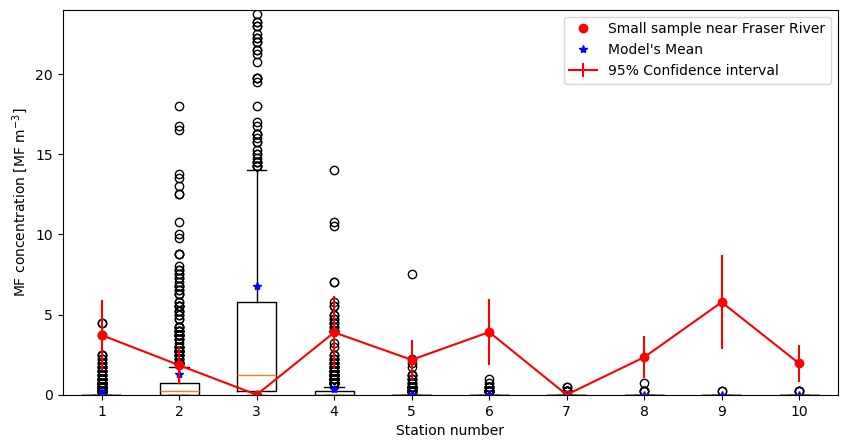

In [36]:
fig = plt.figure(figsize=(10,5))
plt.boxplot(cons.T)
plt.plot(np.arange(1,11),loriobs,'ro',label="Small sample near Fraser River")
#plt.fill_between(np.arange(1,11),np.zeros_like(np.arange(1,11)),np.max(cons.T,axis=0)*24,alpha=0.5,color='grey',label='WWTP efficiency range')
#plt.scatter(np.arange(1,11),np.max(cons.T,axis=0)*24,color='grey')
plt.plot(np.arange(1,11),np.mean(cons,axis=1),'b*',label="Model's Mean")
plt.errorbar(np.arange(1,11),loriobs,yerr=np.array(loriobs)*1.96*Nerr,label="95% Confidence interval",c = 'r')
plt.legend()
plt.ylim(0,24)
#plt.yscale('log')
plt.ylabel(r'MF concentration [MF m$^{-3}$]')
plt.xlabel(r'Station number')
plt.savefig('Loriobs.pdf')

/tmp/ipykernel_3052330/1490963846.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  CONC.append(float(np.apply_over_axes(np.sum,CONC_aver[:2,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],[0,1,2])/(2*(1+ni*2)**2)))


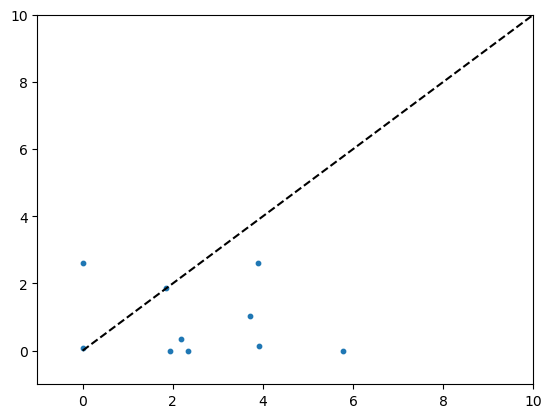

In [32]:
#conc = np.load(path_runs+runs['5,000 s'][0].split('.')[0]+'.npy')/runs['5,000 s'][1]
ni = 3
CONC = []
for ind,ii in enumerate(i_lori):
        if ni ==0:
            CONC.append(np.sum(CONC_aver[:5,int(j[ind]/3),int(ii/3)],axis=0)/5)
        else:
            CONC.append(float(np.apply_over_axes(np.sum,CONC_aver[:2,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],[0,1,2])/(2*(1+ni*2)**2)))
fig = plt.figure()
plt.scatter(np.array(loriobs),CONC,s= 10,label="Lori")
plt.xlim([-1,10])
plt.ylim([-1,10])
plt.plot(np.linspace(0,10,2),np.linspace(0,10,2),'k--')

In [33]:
def coord_to_dec(coord):     
    deg = int(coord.split('°')[0])
    mins = float(coord.split('°')[1].split('’')[0])
    Dir = coord.split('°')[1].split('’')[1]
    if 'W' in Dir or 'S' in Dir:
        Dir = -1
    else:
        Dir = 1
    return Dir*(deg+(mins)/60)

Lat = ['49°43.60’ N','49°15.00’ N','49°12.62’ N','49°03.90’ N','48°31.32’ N','48°18.00’ N']
Lon = ['124°40.80’ W','123°40.00’ W','123°18.00’ W','123°19.00’ W','123°14.19’ W','124°00.00’ W']

Latd = []
Lond = []

for i in range(len(Lat)):
    Latd.append(coord_to_dec(Lat[i]))
    Lond.append(coord_to_dec(Lon[i]))

In [34]:
j,i = finder(jjii,Latd,Lond)

In [35]:
nicolecoord = [49.3276121298886, -123.22216999756373]
nicoledepth = [0.5,30,60]
concni = [6.2,3.7,6.2]
stdni = [1.3,0.6,1.6]

j_nicole,i_nicole=finder(jjii,nicolecoord[0],nicolecoord[1])

In [36]:
gdepth = mask.gdepw_0[0,:,0,0].values

In [37]:
#conc = np.load(path_runs+runs['5,000 s'][0].split('.')[0]+'.npy')/runs['5,000 s'][1]
ni = 3
conc3 = []
for ind,iid in enumerate(nicoledepth):
    ii = int(np.argmin(gdepth-iid))
    if ni ==0:
        conc3.append(np.sum(CONC_aver[:2,int(j_nicole/3),int(i_nicole/3)],axis=0)/2)
    else:
        conc3.append(float(np.apply_over_axes(np.sum,CONC_aver[ii:ii+5,int(j_nicole/3)-ni:int(j_nicole/3)+ni+1,int(i_nicole/3)-ni:int(i_nicole/3)+ni+1],[0,1,2])/(5*(1+ni*2)**2)))

/tmp/ipykernel_3052330/2244619526.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conc3.append(float(np.apply_over_axes(np.sum,CONC_aver[ii:ii+5,int(j_nicole/3)-ni:int(j_nicole/3)+ni+1,int(i_nicole/3)-ni:int(i_nicole/3)+ni+1],[0,1,2])/(5*(1+ni*2)**2)))


In [38]:
#conc = np.load(path_runs+runs['5,000 s'][0].split('.')[0]+'.npy')/runs['5,000 s'][1]
ni = 3
CONC2 = []
for ind,ii in enumerate(i):
        if ni ==0:
            CONC2.append(np.sum(CONC_aver[:2,int(j[ind]/3),int(ii/3)],axis=0)/2)
        else:
            CONC2.append(float(np.apply_over_axes(np.sum,CONC_aver[:2,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],[0,1,2])/(2*(1+ni*2)**2)))

/tmp/ipykernel_3052330/320224970.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  CONC2.append(float(np.apply_over_axes(np.sum,CONC_aver[:2,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],[0,1,2])/(2*(1+ni*2)**2)))


In [39]:
desobs = [6500,3000,3500,3600,3800,2000]

In [40]:
# ds = xr.open_dataset(path_runs+months['Jan'][0], decode_times=False)
# DS = ds.to_dataframe()
# DS = DS[DS.time>0]
# con = np.empty(len(latobs),112)
# for i in range(len(latobs)):
#     coni = check_variability(latobs[i],lonobs[i],DS,size = 3)
#     con[i,:] = coni

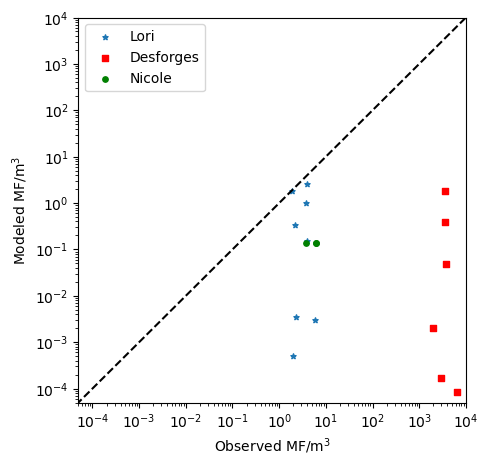

In [ ]:
fig = plt.figure(figsize= (5,5))
plt.scatter(np.array(loriobs),np.array(CONC),s= 15,label="Lori",marker='*')
# plt.xlim([-1,10])
# plt.ylim([-1,10])
plt.plot(np.linspace(0,10000,2),np.linspace(0,10000,2),'k--')
plt.scatter(np.array(desobs),np.array(CONC2),s= 15,c='red',label='Desforges',marker='s')
plt.scatter(np.array(concni),np.array(conc3),s= 15,c='green',label='Nicole',marker='o')

plt.xlabel('Observed MF/m$^3$')
plt.ylabel('Modeled MF/m$^3$')
plt.xscale('log')#
plt.yscale('log')
plt.xlim(5e-5,1e4)
plt.ylim(5e-5,1e4)

#plt.ylim(1e-3,100)
plt.legend()
plt.errorbar(np.array(concni),np.array(conc3),yerr =[conc3-np.array(conc3)/10,np.array(conc3)*24-conc3] ,linestyle='none',c='g')
plt.errorbar(np.array(desobs),np.array(CONC2),yerr =[CONC2-np.array(CONC2)/10,np.array(CONC2)*24-CONC2] ,linestyle='none',c='r')
plt.errorbar(np.array(loriobs),np.array(CONC),yerr =[CONC-np.array(CONC)/10,np.array(CONC)*24-CONC] ,linestyle='none',c='b')

In [ ]:
from geopy.distance import distance

dist= [0]
for st in range(1,len(latobs)):
    coord1 = (latobs[st-1], lonobs[st-1])
    coord2 = (latobs[st], lonobs[st])

    dist.append(distance(coord1, coord2).kilometers)
dist= np.cumsum(dist)

dist2= [0]
for st in range(1,len(Latd)):
    coord1 = (Latd[st-1], Lond[st-1])
    coord2 = (Latd[st], Lond[st])

    dist2.append(distance(coord1, coord2).kilometers)
dist2= np.cumsum(dist2)

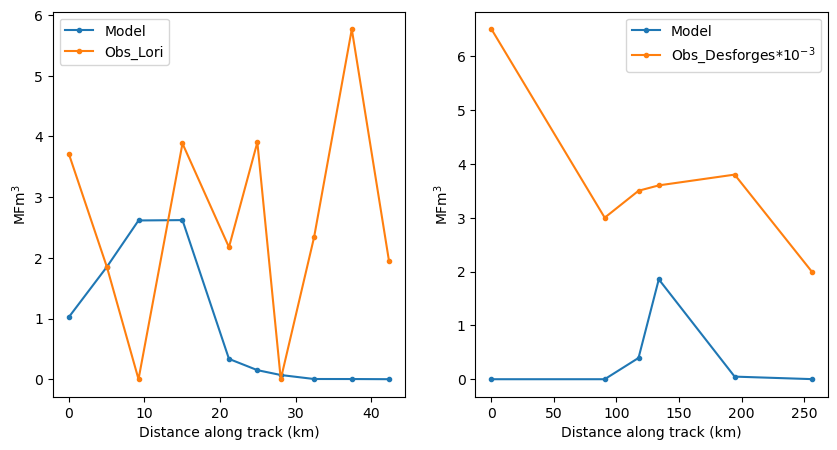

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(dist,CONC,'.-',label='Model')
axs[0].plot(dist,loriobs,'.-',label='Obs_Lori')
axs[0].set_ylabel('MFm$^3$')
axs[0].set_xlabel('Distance along track (km)')
axs[0].legend()
axs[1].plot(dist2,CONC2,'.-',label='Model')
axs[1].plot(dist2,np.array(desobs)/1000,'.-',label='Obs_Desforges*10$^{-3}$')
axs[1].set_ylabel('MFm$^3$')
axs[1].set_xlabel('Distance along track (km)')
axs[1].legend()

In [ ]:
np.array(desobs)*0.082*0.8

array([426.4 , 196.8 , 229.6 , 236.16, 249.28, 131.2 ])

Text(0.5, 1.0, 'Salish Sea Estimations')

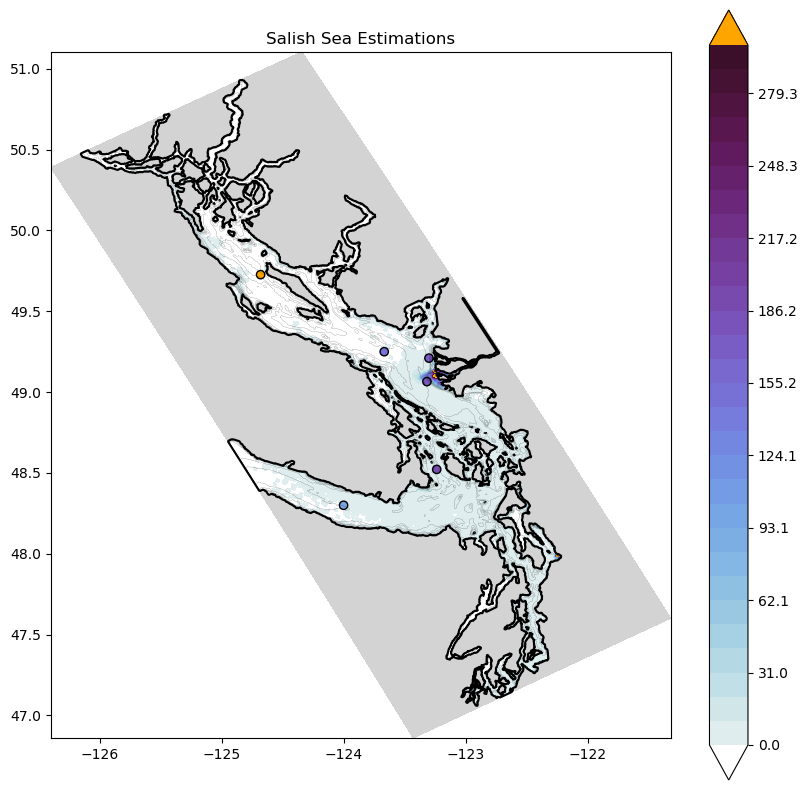

In [ ]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense
levels = np.linspace(1e-5,300,30)
fig, ax = plt.subplots(1,1,figsize=(10, 10))
aa = ax.contourf(coords.nav_lon[::Ni,::Ni], coords.nav_lat[::Ni,::Ni],24*np.sum(CONC_aver[:2,:,:],axis=0)/2,levels=levels,extend='both',cmap=cmocean.cm.dense)
ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
aa2=plt.scatter(Lond,Latd,c=np.array(desobs)*0.062*0.8,cmap=cmocean.cm.dense,vmax=300,vmin=1e-5,edgecolors='black')

plt.colorbar(aa)
aa.cmap.set_over('orange')
aa.cmap.set_under('white')
plt.title('Salish Sea Estimations')

In [ ]:
# cons = np.zeros([len(Latd),690])

# for i in range(len(Latd)):
#     con = []
#     for mes in months:
#         ds = xr.open_dataset(path_runs+months[mes][0], decode_times=False)
#         DS = ds.to_dataframe()
#         DS = DS[DS.time>0]
#         con = np.append(con,check_variability(Latd[i],Lond[i],DS,size = 4))
#     cons[i,:] = con
#np.save('modelatdesforges_5m_4.npy',cons)
cons = np.load('modelatdesforges_5m_4.npy')

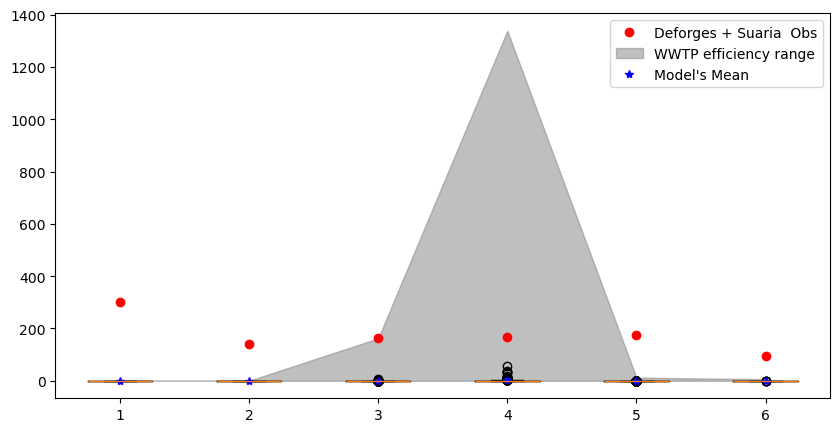

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(cons.T)
plt.plot(np.arange(1,7),np.array(desobs)*0.062*0.75,'ro',label="Deforges + Suaria  Obs")
plt.fill_between(np.arange(1,7),np.zeros_like(np.arange(1,7)),np.max(cons.T,axis=0)*24,alpha=0.5,color='grey',label='WWTP efficiency range')
#plt.scatter(np.arange(1,11),np.max(cons.T,axis=0)*24,color='grey')
plt.plot(np.arange(1,7),np.mean(cons,axis=1),'b*',label="Model's Mean")
plt.legend()
#plt.ylim(-1,200)

In [ ]:
def modelvsobs(j,i,conc,ni=0):
    CONC = []
    for ind,ii in enumerate(i):
        if ni ==0:
            conce = np.sum(conc[:5,int(j[ind]/3),int(ii/3)],axis=0)/5
        else:
            conce = np.sum(np.sum(np.sum(conc[:5,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],axis=0),axis=0),axis=0)/(5*(1+ni*2)**2)
        CONC.append(conce)
    return CONC

NNl = []
jjj = []
iii = []
for iloca in range(len(Lond)):
    jj,ii=finder(jjii,Latd[iloca],Lond[iloca])
    jjj.append(jj)
    iii.append(ii)
for alpha in runs: 
    CONC = np.load(path_runs+runs[alpha][0].split('.')[0]+'.npy')/runs[alpha][1]
    NN = modelvsobs(jjj,iii,CONC,5)
    NNl.append(np.array(NN))
#plt.errorbar(3600/5000, nn, yerr = [nn-np.min(NNl),np.max(NNl)-nn], linestyle='None', color= 'tab:blue',marker='.')

In [ ]:
(nn-np.array(NNl).T[:,0])/10

array([ 0.21780356,  0.21780356,  0.19731969, -0.02185472,  0.21589172,
        0.21769009])

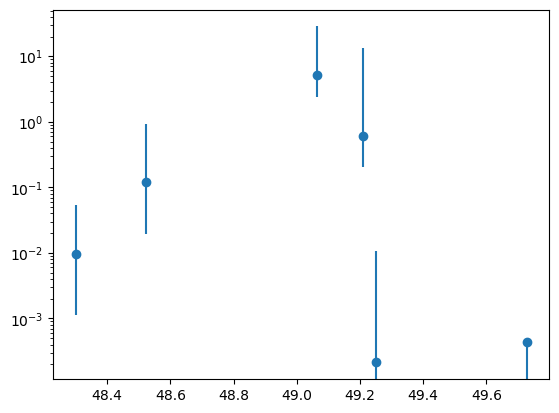

In [ ]:
#for i in range(7):
nn = np.array(NNl).T[:,4]
plt.scatter(Latd,nn)
plt.errorbar(Latd,nn, yerr = [(nn-np.array(NNl).T[:,0]),(np.array(NNl).T[:,-1]-nn+4.346905e-04)*24],linestyle='none')
plt.yscale('log')


In [ ]:
locss=['W Texada','CSoG','Van','Haro','Fraser','JdF']

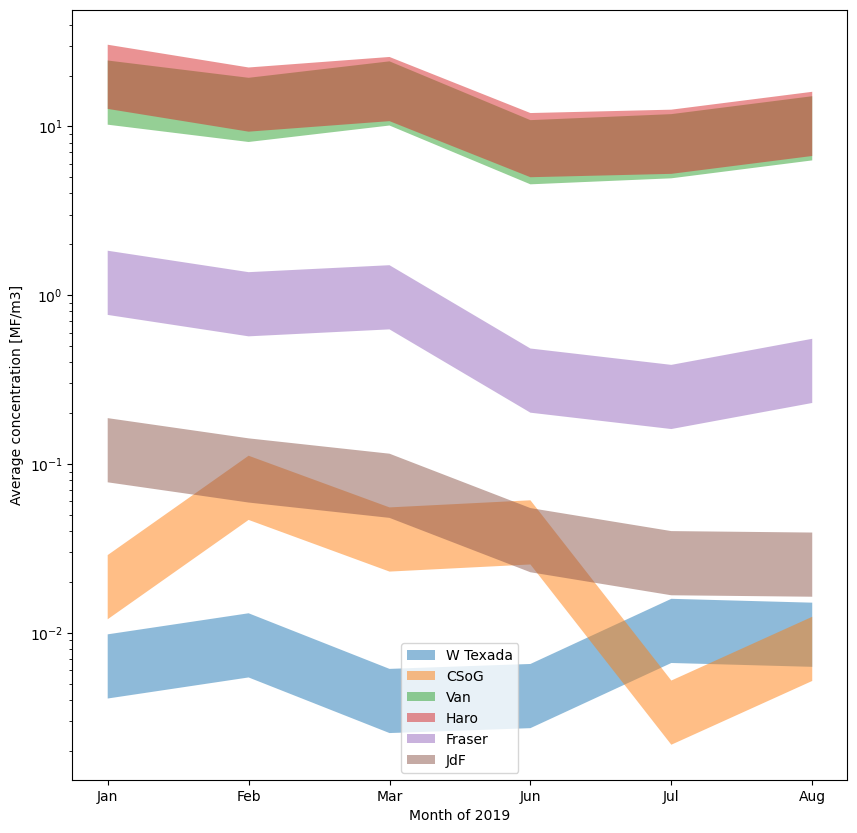

In [ ]:
def modelvsobs(j,i,conc,ni=0,zi=2):
    CONC = []
    if type(i)==list:
        for ind,ii in enumerate(i):
            if ni ==0:
                CONC.append(np.sum(conc[:zi,int(j[ind]/3),int(ii/3)],axis=0)/zi)
            else:
                CONC.append(np.sum(np.sum(np.sum(conc[:zi,int(j[ind]/3)-ni:int(j[ind]/3)+ni+1,int(ii/3)-ni:int(ii/3)+ni+1],axis=0),axis=0),axis=0)/(zi*(1+ni*2)**2))
        return np.mean(CONC),np.std(CONC)/len(CONC)
    else:
        if ni ==0:
                CONC=np.sum(conc[:zi,int(j/3),int(i/3)],axis=0)/zi
        else:
                CONC=np.sum(np.sum(np.sum(conc[:zi,int(j/3)-ni:int(j/3)+ni+1,int(i/3)-ni:int(i/3)+ni+1],axis=0),axis=0),axis=0)/(zi*(1+ni*2)**2)
        return CONC


iii = [250,500,1000,2500,5000,10000,50000]
iii = ['Jan','Feb','Mar','Jun','Jul','Aug']

fig,axs=plt.subplots(1,1,figsize=(10,10))
for loc in range(len(i)):
    NNl = []
    for alpha in months: 
        CONC = np.load(path_runs+months[alpha][0].split('.')[0]+'.npy')*13.7/1
        NN = modelvsobs(j[loc],i[loc],CONC,10,5)
        NNl.append(NN)
        if alpha == '5,000 s':
            print(f'For alpha of {alpha} the estimated average concentration of {locss[loc]} is {NN} MF/m3')
    plt.fill_between(iii,NNl,np.array(NNl)/2.4,label=locss[loc],alpha=0.5)
    plt.xlabel(r'Month of 2019')

    plt.ylabel('Average concentration [MF/m3]')
axs.set_yscale('log')
plt.legend()
